In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.tail(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
116048,536022970387,X,OTHER,3.000,90000,180,2012-03-01,05/2012,72,1.0,24.0,726.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116049,745013346682,Y,OTHER,4.250,492000,360,2012-01-01,03/2012,66,1.0,38.0,794.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116050,627135532331,X,Browning-Hart,3.875,288000,240,2012-01-01,03/2012,80,2.0,33.0,790.0,A23,0.0,725.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116051,374363980675,X,"Swanson, Newton and Miller",4.375,107000,360,2012-01-01,03/2012,70,1.0,16.0,782.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116052,749843159666,X,OTHER,4.375,86000,360,2012-02-01,04/2012,75,1.0,37.0,673.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,22.0,801.0,A23,25.0,802.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,37.0,796.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,49.0,724.0,B12,0.0,723.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,13.0,755.0,A23,0.0,746.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
116057,763308490661,Z,Thornton-Davis,3.375,252000,180,2012-01-01,03/2012,29,2.0,40.0,770.0,A23,0.0,766.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv("test.csv")

In [5]:
df_test.tail(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
35856,35857,X,OTHER,4.250,240000,360,01/01/12,Mar-12,73,2,38,803,C86,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0
35857,35858,X,Browning-Hart,4.000,304000,360,01/02/12,May-12,80,1,22,776,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35858,35859,X,Browning-Hart,4.125,79000,180,01/02/12,Apr-12,64,1,44,764,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35859,35860,X,OTHER,4.000,237000,360,01/01/12,Mar-12,64,1,45,698,B12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
35860,35861,Y,Browning-Hart,3.250,226000,180,01/02/12,Apr-12,80,2,24,791,A23,0,781,0,0,0,0,0,0,0,0,0,0,0,0,0
35861,35862,X,OTHER,4.125,232000,240,01/01/12,Apr-12,80,2,30,684,C86,0,712,0,0,0,0,0,0,0,0,0,0,0,0,0
35862,35863,Z,Edwards-Hoffman,3.375,204000,180,01/01/12,Mar-12,80,1,30,812,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35863,35864,X,Browning-Hart,4.250,200000,360,01/02/12,Apr-12,52,2,38,624,B12,0,646,0,0,0,0,0,0,0,0,0,1,0,0,0
35864,35865,Y,Edwards-Hoffman,4.375,400000,360,01/02/12,Apr-12,66,1,34,753,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35865,35866,X,OTHER,4.375,182000,360,01/02/12,Apr-12,70,1,3,0,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data analysis

#checking the number of variables in various columns


In [6]:
df["source"].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [7]:
df["origination_date"].value_counts()

2012-02-01    52334
2012-01-01    49093
2012-03-01    14631
Name: origination_date, dtype: int64

In [8]:
df["loan_purpose"].value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [9]:
df["first_payment_date"].value_counts()

04/2012    52840
03/2012    47680
05/2012    15014
02/2012      524
Name: first_payment_date, dtype: int64

In [10]:
df["insurance_type"].value_counts()

0.0    115680
1.0       378
Name: insurance_type, dtype: int64

In [11]:
df["financial_institution"].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

#LOOKING FOR NULL VALUES IN THE DATASET

In [12]:
df.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

# one-hot encoding for the categorical features in the train data

In [13]:
df_new = df

In [14]:
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(df_new[['financial_institution']]).toarray()
gen_feature_arr
gen_feature_labels = list(set(df_new['financial_institution']))
gen_feature_labels
df_new.pop("financial_institution")
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)
gen_features["loan_id"] = df_new["loan_id"]
type(gen_features["Taylor, Hunt and Rodriguez"][0])

numpy.float64

In [15]:
df_new.shape

(116058, 28)

In [16]:
gen_features.shape

(116058, 20)

In [17]:
df_new = pd.merge(df_new, gen_features)
print(df_new.shape)
df_new.tail(10)

(116058, 47)


,loan_id,source,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,"Turner, Baldwin and Rhodes",Browning-Hart,"Miller, Mcclure and Allen","Sanchez, Hays and Wilkerson",Edwards-Hoffman
116048,536022970387,X,3.000,90000,180,2012-03-01,05/2012,72,1.0,24.0,726.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116049,745013346682,Y,4.250,492000,360,2012-01-01,03/2012,66,1.0,38.0,794.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116050,627135532331,X,3.875,288000,240,2012-01-01,03/2012,80,2.0,33.0,790.0,A23,0.0,725.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116051,374363980675,X,4.375,107000,360,2012-01-01,03/2012,70,1.0,16.0,782.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
116052,749843159666,X,4.375,86000,360,2012-02-01,04/2012,75,1.0,37.0,673.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116053,382119962287,Y,4.125,153000,360,2012-02-01,04/2012,88,2.0,22.0,801.0,A23,25.0,802.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116054,582803915466,Z,3.000,150000,120,2012-01-01,03/2012,35,1.0,37.0,796.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116055,837922316947,X,3.875,166000,360,2012-02-01,04/2012,58,2.0,49.0,724.0,B12,0.0,723.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116056,477343182138,X,4.250,169000,360,2012-02-01,04/2012,74,2.0,13.0,755.0,A23,0.0,746.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116057,763308490661,Z,3.375,252000,180,2012-01-01,03/2012,29,2.0,40.0,770.0,A23,0.0,766.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
gen_feature_source = gen_ohe.fit_transform(df_new[['source']]).toarray()
gen_feature_source
gen_feature_labels_source = list(set(df_new['source']))
gen_feature_labels_source
df_new.pop("source")
gen_features_source = pd.DataFrame(gen_feature_source, columns=gen_feature_labels_source)
gen_features_source["loan_id"] = df_new["loan_id"]


In [19]:
df_new = pd.merge(df_new, gen_features_source)
print(df_new.shape)
df_new.head(10)

(116058, 49)


,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,"Turner, Baldwin and Rhodes",Browning-Hart,"Miller, Mcclure and Allen","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y
0,268055008619,4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,672831657627,4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,742515242108,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,601385667462,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,273870029961,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,769060024464,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,148071614687,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,853383953266,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,423590072335,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,308990846816,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
gen_feature_loan_purpose = gen_ohe.fit_transform(df_new[['loan_purpose']]).toarray()
gen_feature_loan_purpose
gen_feature_labels_loan_purpose = list(set(df_new['loan_purpose']))
gen_feature_labels_loan_purpose
df_new.pop("loan_purpose")
gen_features_loan_purpose = pd.DataFrame(gen_feature_loan_purpose, columns=gen_feature_labels_loan_purpose)
gen_features_loan_purpose["loan_id"] = df_new["loan_id"]


In [21]:
df_new = pd.merge(df_new, gen_features_loan_purpose)
print(df_new.shape)
df_new.head(10)

(116058, 51)


,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,"Turner, Baldwin and Rhodes",Browning-Hart,"Miller, Mcclure and Allen","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y,A23,B12,C86
0,268055008619,4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,672831657627,4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,742515242108,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,601385667462,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,273870029961,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,769060024464,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,148071614687,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,853383953266,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,423590072335,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,308990846816,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:

gen_feature_date = gen_ohe.fit_transform(df_new[['origination_date']]).toarray()
print(gen_feature_date)
gen_feature_labels_date = list(set(df_new['origination_date']))
print(gen_feature_labels_date)
df_new.pop("origination_date")
gen_features_date = pd.DataFrame(gen_feature_date, columns=gen_feature_labels_date)
gen_features_date["loan_id"] = df_new["loan_id"]

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
['2012-02-01', '2012-01-01', '2012-03-01']


In [23]:
df_new.shape

(116058, 50)

In [24]:
df_new = pd.merge(df_new, gen_features_date)
print(df_new.shape)
df_new.head(10)

(116058, 53)


,loan_id,interest_rate,unpaid_principal_bal,loan_term,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,"Turner, Baldwin and Rhodes",Browning-Hart,"Miller, Mcclure and Allen","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y,A23,B12,C86,2012-02-01,2012-01-01,2012-03-01
0,268055008619,4.250,214000,360,05/2012,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,672831657627,4.875,144000,360,03/2012,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,742515242108,3.250,366000,180,03/2012,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,601385667462,4.750,135000,360,04/2012,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,273870029961,4.750,124000,360,04/2012,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,769060024464,4.375,150000,360,04/2012,80,1.0,46.0,675.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,148071614687,4.000,59000,360,04/2012,95,1.0,44.0,723.0,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,853383953266,4.500,319000,300,03/2012,62,1.0,45.0,652.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,423590072335,4.000,520000,360,05/2012,76,1.0,35.0,808.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,308990846816,4.000,214000,360,03/2012,95,2.0,41.0,702.0,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
df_new.pop("first_payment_date")
print(df_new.shape)

(116058, 52)


# one-hot encoding on test dataset

In [26]:
df_test_new = df_test

gen_test_arr = gen_ohe.fit_transform(df_test_new[['financial_institution']]).toarray()
gen_test_arr
gen_test_labels = list(set(df_test_new['financial_institution']))
gen_test_labels
df_test_new.pop("financial_institution")
gen_test_features = pd.DataFrame(gen_test_arr, columns=gen_test_labels)
gen_test_features["loan_id"] = df_test_new["loan_id"]


In [27]:
df_test_new = pd.merge(df_test_new, gen_test_features)
print(df_test_new.shape)
df_test_new.head(10)

(35866, 46)


,loan_id,source,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,Browning-Hart,"Miller, Mcclure and Allen","Turner, Baldwin and Rhodes","Sanchez, Hays and Wilkerson",Edwards-Hoffman
0,1,Y,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,X,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Y,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,X,4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,X,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Y,3.625,416000,360,01/02/12,Apr-12,65,2,19,802,C86,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,X,3.500,272000,180,01/02/12,Apr-12,77,2,8,777,A23,0,779,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,X,3.125,160000,120,01/01/12,Mar-12,54,2,18,704,B12,0,803,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,X,3.250,236000,180,01/02/12,Apr-12,42,2,33,790,A23,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,10,Z,4.375,98000,360,01/02/12,Apr-12,80,1,36,737,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
gen_test_source = gen_ohe.fit_transform(df_test_new[['source']]).toarray()
gen_test_source
gen_test_labels_source = list(set(df_test_new['source']))
gen_test_labels_source
df_test_new.pop("source")
gen_data_test_source = pd.DataFrame(gen_test_source, columns=gen_test_labels_source)
gen_data_test_source["loan_id"] = df_test_new["loan_id"]


In [29]:
df_test_new = pd.merge(df_test_new, gen_data_test_source)
print(df_test_new.shape)
df_test_new.head(10)

(35866, 48)


,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,Browning-Hart,"Miller, Mcclure and Allen","Turner, Baldwin and Rhodes","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y
0,1,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,6,3.625,416000,360,01/02/12,Apr-12,65,2,19,802,C86,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,3.500,272000,180,01/02/12,Apr-12,77,2,8,777,A23,0,779,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,3.125,160000,120,01/01/12,Mar-12,54,2,18,704,B12,0,803,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,9,3.250,236000,180,01/02/12,Apr-12,42,2,33,790,A23,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,10,4.375,98000,360,01/02/12,Apr-12,80,1,36,737,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
gen_test_loan_purpose = gen_ohe.fit_transform(df_test_new[['loan_purpose']]).toarray()
gen_test_loan_purpose
gen_test_labels_loan_purpose = list(set(df_test_new['loan_purpose']))
gen_test_labels_loan_purpose
df_test_new.pop("loan_purpose")
gen_test_loan_purpose = pd.DataFrame(gen_test_loan_purpose, columns=gen_test_labels_loan_purpose)
gen_test_loan_purpose["loan_id"] = df_test_new["loan_id"]


In [31]:
df_test_new = pd.merge(df_test_new, gen_test_loan_purpose)
print(df_test_new.shape)
df_test_new.head(10)

(35866, 50)


,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,Browning-Hart,"Miller, Mcclure and Allen","Turner, Baldwin and Rhodes","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y,C86,A23,B12
0,1,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,4.125,123000,180,01/02/12,Apr-12,41,2,24,798,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,6,3.625,416000,360,01/02/12,Apr-12,65,2,19,802,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,7,3.500,272000,180,01/02/12,Apr-12,77,2,8,777,0,779,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,8,3.125,160000,120,01/01/12,Mar-12,54,2,18,704,0,803,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,9,3.250,236000,180,01/02/12,Apr-12,42,2,33,790,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,10,4.375,98000,360,01/02/12,Apr-12,80,1,36,737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
gen_test_date = gen_ohe.fit_transform(df_test_new[['origination_date']]).toarray()
print(gen_test_date)
gen_test_labels_date = list(set(df_test_new['origination_date']))
print(gen_test_labels_date)
df_test_new.pop("origination_date")
gen_test_date = pd.DataFrame(gen_test_date, columns=gen_test_labels_date)
gen_test_date["loan_id"] = df_test_new["loan_id"]

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
['01/03/12', '01/01/12', '01/02/12']


In [33]:
df_test_new = pd.merge(df_test_new, gen_test_date)
print(df_test_new.shape)
df_test_new.head(10)

(35866, 52)


,loan_id,interest_rate,unpaid_principal_bal,loan_term,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,Browning-Hart,"Miller, Mcclure and Allen","Turner, Baldwin and Rhodes","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y,C86,A23,B12,01/03/12,01/01/12,01/02/12
0,1,3.875,417000,360,Apr-12,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,4.500,113000,360,Apr-12,80,2,33,793,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,4.500,72000,360,Mar-12,75,1,34,710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,4.125,123000,180,Apr-12,41,2,24,798,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,3.250,166000,180,Apr-12,53,2,12,767,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,6,3.625,416000,360,Apr-12,65,2,19,802,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,7,3.500,272000,180,Apr-12,77,2,8,777,0,779,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,8,3.125,160000,120,Mar-12,54,2,18,704,0,803,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,9,3.250,236000,180,Apr-12,42,2,33,790,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,10,4.375,98000,360,Apr-12,80,1,36,737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [34]:
df_test_new.pop("first_payment_date")
print(df_test_new.shape)

(35866, 51)


In [35]:
df_test_new.head(10)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,OTHER,Thornton-Davis,"Swanson, Newton and Miller","Martinez, Duffy and Bird",Chapman-Mcmahon,"Romero, Woods and Johnson","Cole, Brooks and Vincent",Nicholson Group,Richardson Ltd,Anderson-Taylor,Sanchez-Robinson,Richards-Walters,"Taylor, Hunt and Rodriguez",Suarez Inc,Browning-Hart,"Miller, Mcclure and Allen","Turner, Baldwin and Rhodes","Sanchez, Hays and Wilkerson",Edwards-Hoffman,X,Z,Y,C86,A23,B12,01/03/12,01/01/12,01/02/12
0,1,3.875,417000,360,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,4.500,113000,360,80,2,33,793,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,4.500,72000,360,75,1,34,710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,4.125,123000,180,41,2,24,798,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,3.250,166000,180,53,2,12,767,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,6,3.625,416000,360,65,2,19,802,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,7,3.500,272000,180,77,2,8,777,0,779,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,8,3.125,160000,120,54,2,18,704,0,803,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,9,3.250,236000,180,42,2,33,790,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,10,4.375,98000,360,80,1,36,737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# creating synthetic data points using SMOTE

In [36]:
df_new.shape

(116058, 52)

In [37]:
X = np.array(df_new.ix[:, df_new.columns != 'm13'])
y = np.array(df_new.ix[:, df_new.columns == 'm13'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (116058, 51)
Shape of y: (116058, 1)


In [38]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (81240, 51)
Number transactions y_train dataset:  (81240, 1)
Number transactions X_test dataset:  (34818, 51)
Number transactions y_test dataset:  (34818, 1)


In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [451]
Before OverSampling, counts of label '0': [80789] 

After OverSampling, the shape of train_X: (161578, 51)
After OverSampling, the shape of train_y: (161578,) 

After OverSampling, counts of label '1': 80789
After OverSampling, counts of label '0': 80789


# Tuning Logistic regression hyper parameters using gridsearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {'C': np.linspace(1, 10, 10)}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=10, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   12.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   18.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

I have already experimented with the hyperparameters in a different file and these are the ones that work the best, 
even if somebody wants to experiment they can add more params to GridSearchCV

In [45]:
clf.best_params_

{'C': 1.0}

In [ ]:
lr1 = LogisticRegression(C=8.0,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

Using confusion matric and recall as the evaluation metrics

In [97]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 70.06651884700665%


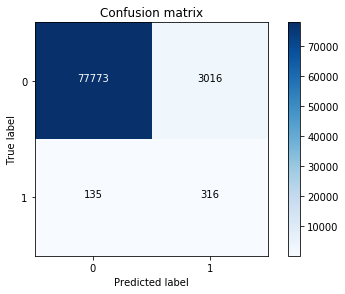

In [98]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 69.72972972972973%


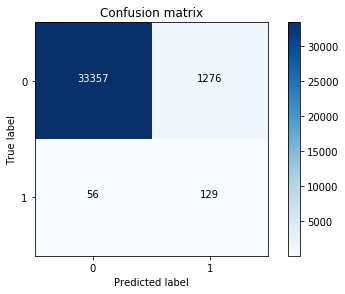

In [99]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [100]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

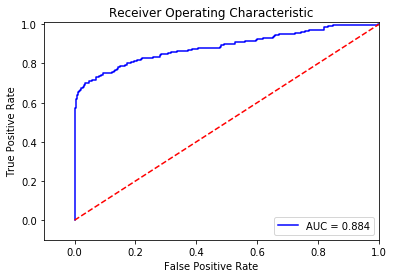

In [101]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
roc_auc

0.8839558583790964

In [103]:
X_train.shape

(81240, 50)

In [104]:
df_test_new.shape

(35866, 51)

In [105]:
X_test_new = np.array(df_test_new.ix[:, df_test_new.columns != 'loan_id'])

In [106]:
X_test_new.shape

(35866, 50)

In [107]:
final_pred = lr1.predict(X_test_new)

In [108]:
final_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [109]:
final_result = pd.DataFrame(final_pred, columns = ["m13"])

In [110]:
final_result.to_csv("submission3.csv")

In [123]:
df_new.shape

(116058, 51)

logistic regression does not seem to perform well on the dataset, while random forest and xboost seem to provide very good results

# using random forest classifier


In [164]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Normal','Fraud']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [165]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

In [225]:
type(y_train_res)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state = 42)

In [167]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

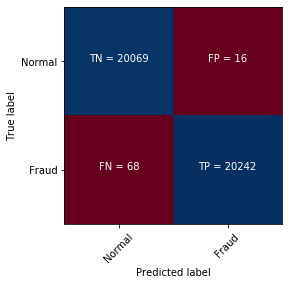

Recall=0.997 
Precision=0.999
F1=0.998
Average precision-recall score: 0.999


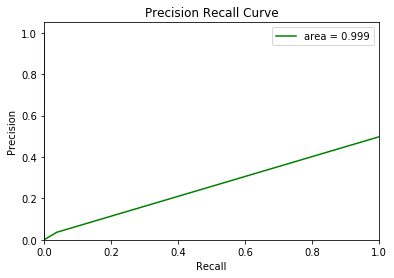

In [168]:
pre = RandomForestClassifier(n_jobs=-1, random_state = 42,
                             max_features= 'sqrt', 
                             criterion = 'entropy')
pre.fit(X_train, y_train)

#Make predictions
y_pred = pre.predict(X_test)
try:
    scores = pre.decision_function(X_test)
except:
    scores = pre.predict_proba(X_test)[:,1]

#Make plots
plot_cm(pre, y_pred)
plot_aucprc(pre, scores)

# parameter tuning for random forest classifier

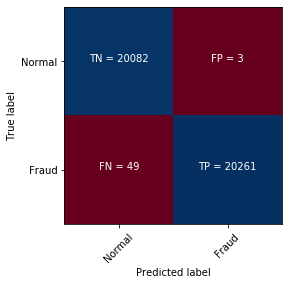

Recall=0.998 
Precision=1.000
F1=0.999
Average precision-recall score: 1.000


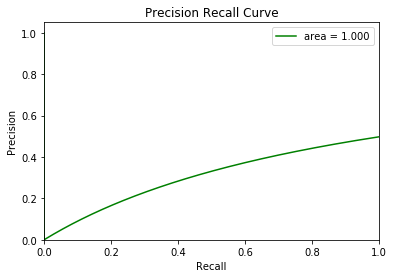

In [226]:
rfc = RandomForestClassifier(n_jobs=-1, random_state = 42,
                             n_estimators=500, 
                             max_features='auto',
                             min_samples_leaf=2,
                             criterion = 'entropy')

rfc.fit(X_train_res, y_train_res.ravel())

#Make predictions
y_pred = rfc.predict(X_test)
try:
    scores = rfc.decision_function(X_test)
except:
    scores = rfc.predict_proba(X_test)[:,1]

#Make plots
plot_cm(rfc, y_pred)
plot_aucprc(rfc, scores)

In [170]:
type(X_test)

numpy.ndarray

In [227]:
X_test_new = np.array(df_test_new.ix[:, df_test_new.columns != 'loan_id'])
final_rf_result = rfc.predict(X_test_new)
final_result_rf = pd.DataFrame(final_rf_result, columns = ["m13"])
final_result_rf.to_csv("submission_rf.csv")

# Applying Xgboost

In [174]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

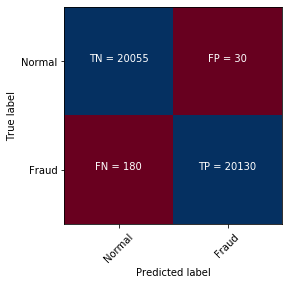

Recall=0.991 
Precision=0.999
F1=0.995
Average precision-recall score: 0.999


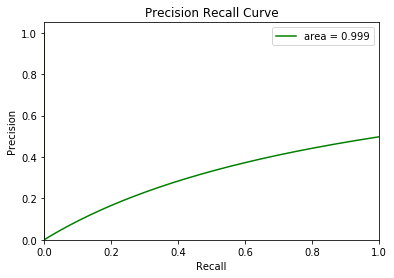

In [175]:
#Make predictions
y_pred = xgb.predict(X_test)
try:
    scores = xgb.decision_function(X_test)
except:
    scores = xgb.predict_proba(X_test)[:,1]
#Make plots
y_pred = xgb.predict(X_test)
plot_cm(xgb, y_pred)
plot_aucprc(xgb, scores)

In [176]:
X_test_new = np.array(df_test_new.ix[:, df_test_new.columns != 'loan_id'])
final_xgb_result = xgb.predict(X_test_new)
final_result_xgb = pd.DataFrame(final_xgb_result, columns = ["m13"])
final_result_xgb.to_csv("submission_xgb.csv")

# Tuning xgboost parameters

In [179]:
type(y_train)

numpy.ndarray

In [180]:
# fraud_ratio=y_train.value_counts()[1]/y_train.value_counts()[0]
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1,3,5], 
             'min_child_weight': [1,3,5], 
             'n_estimators': [100,200,500,1000]} 
#              'scale_pos_weight': [1, 0.1, 0.01, fraud_ratio]}

In [181]:
optimized_GBM = XGBClassifier(n_jobs=-1, random_state = 42,
                             n_estimators=100, 
                             max_depth=1,
                             min_child_weight=1,
                             criterion = 'entropy')
#                              scale_pos_weight=fraud_ratio)
optimized_GBM.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

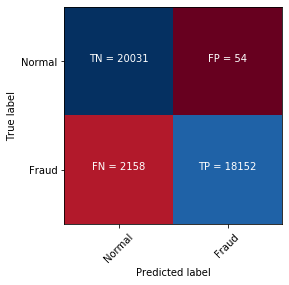

Recall=0.894 
Precision=0.997
F1=0.943
Average precision-recall score: 0.995


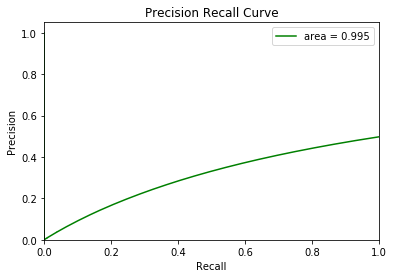

In [182]:
#Make predictions
y_pred = optimized_GBM.predict(X_test)
try:
    scores = optimized_GBM.decision_function(X_test)
except:
    scores = optimized_GBM.predict_proba(X_test)[:,1]
    
#Make plots
plot_cm(optimized_GBM, y_pred)
plot_aucprc(optimized_GBM, scores)

In [185]:
X_test_new = np.array(df_test_new.ix[:, df_test_new.columns != 'loan_id'])
final_optimized_GBM_result = optimized_GBM.predict(X_test_new)
final_result_optimized_GBM = pd.DataFrame(final_optimized_GBM_result, columns = ["m13"])
final_result_optimized_GBM.to_csv("submission_optimized_GBM.csv")

In [199]:
y_pred.shape

(40395,)